# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.030623e+01     8.026381e+00
 * time: 0.002334117889404297
     1     2.850941e+01     5.850540e+00
 * time: 0.008515119552612305
     2     2.014317e+01     6.787639e+00
 * time: 0.013766050338745117
     3     1.410967e+01     4.506835e+00
 * time: 0.018839120864868164
     4     1.119454e+01     1.724766e+00
 * time: 0.02352595329284668
     5     1.034343e+01     3.190868e+00
 * time: 0.027586936950683594
     6     9.798883e+00     1.596270e+00
 * time: 0.03156709671020508
     7     9.148190e+00     1.481648e+00
 * time: 0.037403106689453125
     8     8.631189e+00     1.451900e+00
 * time: 0.04419994354248047
     9     8.389684e+00     1.358783e+00
 * time: 0.051058053970336914
    10     8.233925e+00     9.177272e-01
 * time: 0.05576896667480469
    11     8.208929e+00     1.268360e+00
 * time: 0.06063199043273926
    12     8.147737e+00     7.891556e-01
 * time: 0.06398510932922363
    13     8.089729e+00     6.796717e-01
 

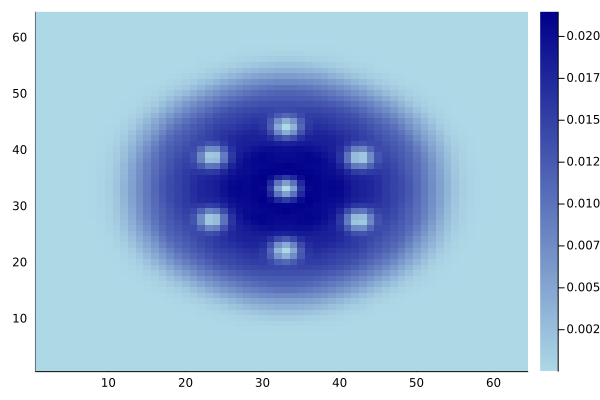

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)